In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

#Define path to the excel file
file_path =r"c:\Users\Dell\Desktop\Data Analytics\Portfolio Projects\Churn Aalaysis\Predictive_data.xlsx"

#Define the sheet name to read a file
sheet_name='vw_churnData'
data =pd.read_excel(file_path,sheet_name=sheet_name)
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   78937-TAM    Male   41     Yes      Tamil Nadu                   12   
1   78945-AND    Male   84     Yes  Andhra Pradesh                   14   
2   78945-TEL  Female   35      No       Telangana                    8   
3   78962-TAM    Male   34     Yes      Tamil Nadu                    7   
4   82030-ASS  Female   81     Yes           Assam                    8   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                22     Deal 1           Yes             No  ...   
2                27     Deal 1           Yes            Yes  ...   
3                 6     Deal 5           Yes             No  ...   
4                 5     Deal 2           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      69.750000   2347.899902     19.670000   
1  Bank Wi

In [19]:
#Data Processing

#Drop colums that wont be used fro prediction
columns_to_drop = ['Customer_ID', 'Churn_Category', 'Churn_Reason']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

#List of columns to be label encoded
columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

label_encoders={}
for column in columns_to_encode:
    label_encoders[column]=LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

#Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0,'Churned':1})

#Split data into features and target

x=data.drop('Customer_Status',axis=1)
y=data['Customer_Status']

# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [21]:
#Train random forest model
# Intilaize the Random Forest Classifier
rf_model=RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model
rf_model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Confusion Matrix:
[[807  53]
 [118 224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       860
           1       0.81      0.65      0.72       342

    accuracy                           0.86      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.86      0.85      1202



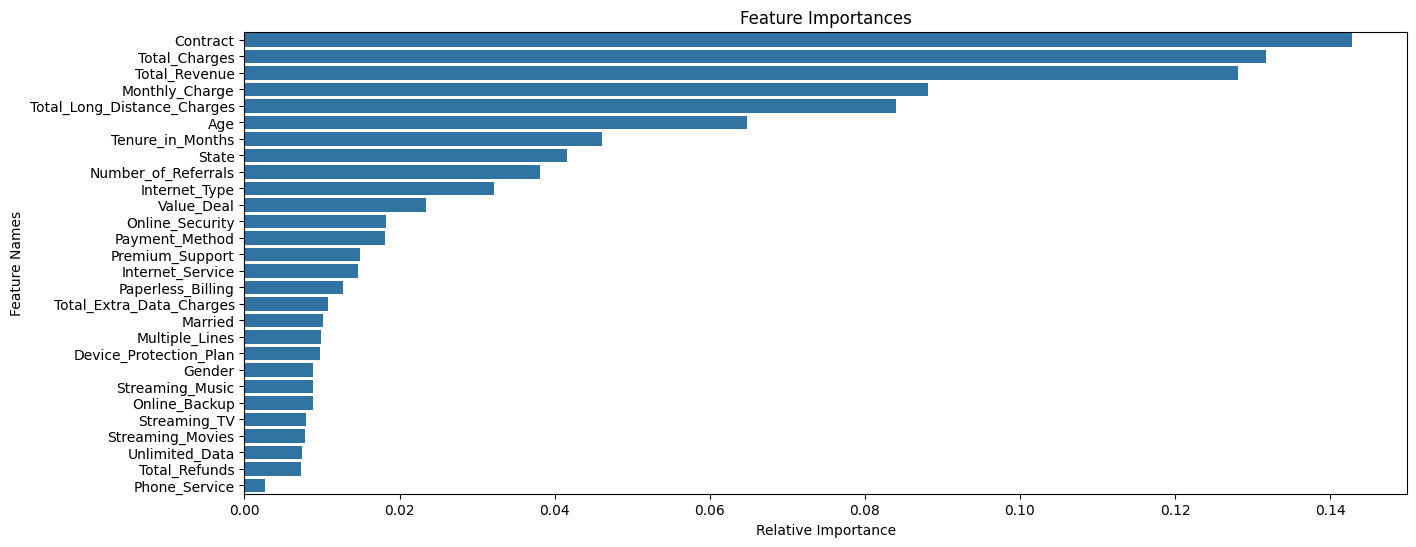

In [27]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(x_train, y_train)

# Evaluate Model
# Make predictions
y_pred = rf_model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]   # Sort descending

# Plot the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [5]:
import sys
print(sys.executable)


c:\Users\Dell\AppData\Local\Programs\Python\Python313\python.exe


In [6]:
!{sys.executable} -m pip install pandas


  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
  


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!{sys.executable} -m pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------- ----------------------- 3.7/8.7 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 23.9 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ------ --------------------------------- 6.6/38.5 MB 32.7 MB/s eta 0:00:01
   ------------- -------------------------- 12.6/38.5 MB 32.1 MB/s eta 0:00:01
   ---------------- ----------------------- 16.0/38.5 MB 25.4 MB/s eta 0:00:01
   ---------------------- ----------------- 21.8/38.5 MB 25.9 MB/s eta 0:00:01
   --------------------------- ------------ 26.2/38.5 MB 24.9 MB/s eta 0:00:01
   -------------------------------- ------- 31.2/38.5 MB 24.5 MB/s eta 0:00:01
   ----------------------------------- ---- 34.6/38.5 MB 23.2 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 20.9 MB/s  0:00:01

  


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!{sys.executable} -m pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!{sys.executable} -m pip install seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
